#Projeto Integrador I - Quadra GO
Projeto de análise de dados para a disciplina Projeto Integrador I na instituição Fatec Votorantim. Os dados utilizados na análise são provenientes da ferramenta MS Project no qual foi implementado previamente um cronograma de implementação do projeto Quadra GO, sendo assim os dados foram exportados em arquivo .csv e trabalhados no presente projeto.

##Carregamento das informações

In [1]:
import pandas as pd
import io
import re
import matplotlib.pyplot as plt
import numpy as np
from typing import Optional
from ipywidgets import widgets
from matplotlib.ticker import FuncFormatter

# Controle de funcionalidades adicionais
loadByFile: bool = False
showUpdatedCsv: bool = True
df = pd.DataFrame()
dfStyled = pd.DataFrame()

# Carregamento dos dados por string
def loadDataByString():
  global df
  csvData = '''
  Index,Id,Nº Grupos,Nome da Tarefa,Duração em dias,Predecessoras,Custo em reais,Início,Término,Nomes dos recursos
  0,0,0,Projeto Integrador,377,,280316.0,2024-07-01,2025-12-09,
  1,1,1,Planejamento Inicial,37,,0.0,2024-07-01,2024-08-20,
  2,2,1.1,Definição da Visão e Missão da Empresa,4,,0.0,2024-07-01,2024-07-04,
  3,3,1.1.1,Estabelecimento da missão,2,,0.0,2024-07-01,2024-07-02,CEO
  4,4,1.1.2,Reunião inicial com os fundadores para alinhar objetivos e expectativas,2,3,0.0,2024-07-03,2024-07-04,CEO
  5,5,1.2,Análise de Mercado,10,2,0.0,2024-07-05,2024-07-18,
  6,6,1.2.1,Pesquisa de mercado para identificar concorrentes e oportunidades,7,,0.0,2024-07-05,2024-07-15,CEO
  7,7,1.2.2,Análise SWOT (Forças/Fraquezas/Oportunidades/Ameaças),3,6,0.0,2024-07-16,2024-07-18,CEO
  8,8,1.3,Plano de Negócios,23,5,0.0,2024-07-19,2024-08-20,
  9,9,1.3.1,Desenvolvimento do plano de negócios completo,15,,0.0,2024-07-19,2024-08-08,CEO
  10,10,1.3.2,Definição de metas,3,9,0.0,2024-08-09,2024-08-13,CEO
  11,11,1.3.3,Projeções financeiras e plano de captação de recursos,5,10,0.0,2024-08-14,2024-08-20,CEO
  12,12,2,Estruturação Jurídica e Administrativa,81,1,28000.0,2024-08-21,2024-12-11,
  13,13,2.1,Registro da Empresa,81,,3000.0,2024-08-21,2024-12-11,
  14,14,2.1.1,Escolha e registro do nome da empresa,1,1,0.0,2024-08-21,2024-08-21,CEO
  15,15,2.1.2,Obtenção de CNPJ e registros necessários,80,14,3000.0,2024-08-22,2024-12-11,Contabilidade
  16,16,2.2,Locação do Imóvel,61,,25000.0,2024-08-22,2024-11-14,
  17,17,2.2.1,Pesquisa e visita a imóveis comerciais,15,14,0.0,2024-08-22,2024-09-11,CEO
  18,18,2.2.2,Negociação e assinatura do contrato de locação,1,17,5000.0,2024-09-12,2024-09-12,Jurídico
  19,19,2.2.3,Adequação do imóvel conforme as necessidades (reformas/mobília/etc),45,18,20000.0,2024-09-13,2024-11-14,Construtora
  20,20,3,Infraestrutura e Equipamentos,85,,49000.0,2024-09-13,2025-01-09,
  21,21,3.1,Compra de Equipamentos,50,,14000.0,2024-09-13,2024-11-21,
  22,22,3.1.1,Orçamento,5,18,1400.0,2024-09-13,2024-09-19,Gerente de desenvolvimento
  23,23,3.1.2,Aquisição de ativos (computadores/móveis/etc),45,22,12600.0,2024-09-20,2024-11-21,Gerente de operação
  24,24,3.2,Configuração do Espaço de Trabalho,35,,35000.0,2024-11-22,2025-01-09,
  25,25,3.2.1,Organização e instalação do escritório,15,23,20000.0,2024-11-22,2024-12-12,Construtora
  26,26,3.2.2,Instalação de infraestrutura de TI (rede/internet/servidores/ambiente dev),20,25,15000.0,2024-12-13,2025-01-09,Infraestutura
  27,27,4,Recrutamento e Seleção de Funcionários,38,12,10640.0,2024-12-12,2025-02-03,
  28,28,4.1,Definição de Perfis e Cargos,6,,1680.0,2024-12-12,2024-12-19,
  29,29,4.1.1,Descrição de cargos e responsabilidades,5,,1400.0,2024-12-12,2024-12-18,CEO;Gerente administrativo
  30,30,4.1.2,Planejamento do organograma da empresa,1,29,280.0,2024-12-19,2024-12-19,CEO;Gerente administrativo
  31,31,4.2,Processo de Recrutamento,33,,8960.0,2024-12-19,2025-02-03,
  32,32,4.2.1,Divulgação das vagas em plataformas de emprego,2,29,560.0,2024-12-19,2024-12-20,Gerente de desenvolvimento
  33,33,4.2.2,Seleção e entrevistas com candidatos,15,32,4200.0,2024-12-23,2025-01-13,Gerente administrativo
  34,34,4.2.3,Contratação e onboard dos funcionários,15,33,4200.0,2025-01-14,2025-02-03,Gerente administrativo
  35,35,5,Desenvolvimento do Software,173,27,150096.0,2025-02-04,2025-10-02,
  36,36,5.1,Iniciação do projeto,13,,5608.0,2025-02-04,2025-02-20,
  37,37,5.1.1,Reuniões com stakeholders,1,,840.0,2025-02-04,2025-02-04,Gerente mercadológico;Desenvolvedor
  38,38,5.1.2,Documentação dos requisitos iniciais,3,37,480.0,2025-02-05,2025-02-07,Analista de produto
  39,39,5.1.3,Escolha das tecnologias e ferramentas a serem utilizadas,4,38,4008.0,2025-02-10,2025-02-13,Cientista de dados;Desenvolvedor;Experiencia do usuário;Gerente de desenvolvimento;QA
  40,40,5.1.4,Designação de papéis e responsabilidades,1,39,280.0,2025-02-14,2025-02-14,Gerente de desenvolvimento
  41,41,5.1.5,Aprovação do orçamento,5,39,0.0,2025-02-14,2025-02-20,CEO
  42,42,5.2,Planejamento do Desenvolvimento,37,,21128.0,2025-02-21,2025-04-14,
  43,43,5.2.1,Análise de requisitos,30,36,13200.0,2025-02-21,2025-04-03,
  44,44,5.2.1.1,Levantamento detalhado de requisitos,15,,6600.0,2025-02-21,2025-03-13,Analista de produto;Gerente mercadológico
  45,45,5.2.1.2,Documentação de processos de negócios,15,,6600.0,2025-03-14,2025-04-03,Analista de produto;Gerente mercadológico
  46,46,5.2.2,Planejamento do cronograma,5,,3728.0,2025-04-04,2025-04-10,
  47,47,5.2.2.1,Definição das fases e marcos do projeto,2,43,560.0,2025-04-04,2025-04-07,Gerente de desenvolvimento
  48,48,5.2.2.2,Estimativa de tempo para cada atividade,3,47,3168.0,2025-04-08,2025-04-10,Cientista de dados;Desenvolvedor;Experiencia do usuário;QA
  49,49,5.2.3,Análise de riscos,7,,4200.0,2025-04-04,2025-04-14,
  50,50,5.2.3.1,Identificação de potenciais riscos,4,43,1680.0,2025-04-04,2025-04-09,Gerente de desenvolvimento;Gerente de operação;Gerente mercadológico
  51,51,5.2.3.2,Desenvolvimento de planos de mitigação,3,50,2520.0,2025-04-10,2025-04-14,Gerente de desenvolvimento;Gerente de operação;Gerente mercadológico
  52,52,5.3,Design e Blueprint,33,,30480.0,2025-04-15,2025-05-29,
  53,53,5.3.1,Pesquisa e contratação de empresa de comunicação visual,3,42,840.0,2025-04-15,2025-04-17,Gerente de desenvolvimento
  54,54,5.3.2,Criação de wireframes e protótipos do aplicativo,20,53,22240.0,2025-04-18,2025-05-15,Cientista de dados;Desenvolvedor;Experiencia do usuário;QA;Estagiário
  55,55,5.3.3,Validação do design com potenciais usuários,10,54,800.0,2025-05-16,2025-05-29,Experiencia do usuário
  56,56,5.3.4,Desenvolvimento do blueprint funcional,15,42,6600.0,2025-04-15,2025-05-05,Analista de produto;Gerente mercadológico
  57,57,5.4,Desenvolvimento do MVP (Produto Mínimo Viável),90,,92880.0,2025-05-30,2025-10-02,
  58,58,5.4.1,Implementação das funcionalidades essenciais do aplicativo beta,70,52,77840.0,2025-05-30,2025-09-04,Cientista de dados;Desenvolvedor;Experiencia do usuário;QA;Estagiário
  59,59,5.4.2,Testes iniciais e correção de bugs,15,58,11280.0,2025-09-05,2025-09-25,Desenvolvedor;QA;Estagiário
  60,60,5.4.3,Entrega de documentação final do projeto,5,52,3760.0,2025-09-26,2025-10-02,Desenvolvedor;QA;Estagiário
  61,61,6,Testes e Ajustes Finais,22,57,17760.0,2025-10-03,2025-11-03,
  62,62,6.1,Testes Internos,10,,5960.0,2025-10-03,2025-10-16,
  63,63,6.1.1,Realização de testes internos com a equipe,5,,2200.0,2025-10-03,2025-10-09,Analista de produto;Gerente mercadológico
  64,64,6.1.2,Ajustes com base no feedback,5,63,3760.0,2025-10-10,2025-10-16,Desenvolvedor;QA;Estagiário
  65,65,6.2,Testes com Usuários,22,,11800.0,2025-10-03,2025-11-03,
  66,66,6.2.1,Seleção de um grupo de usuários para testes beta,2,35,160.0,2025-10-03,2025-10-06,Experiencia do usuário
  67,67,6.2.2,Coleta de feedback e ajustes finais,20,66,11640.0,2025-10-07,2025-11-03,Desenvolvedor;Experiencia do usuário;QA
  68,68,7,Marketing e Lançamento,48,,24820.0,2025-10-03,2025-12-09,
  69,69,7.1,Plano de Marketing,15,57,10200.0,2025-10-03,2025-10-23,Analista de métricas;Gerente de marketing;Social media;Vendas
  70,70,7.2,Lançamento,3,69,1740.0,2025-10-24,2025-10-28,Gerente de marketing;Social media;Vendas
  71,71,7.3,Acompanhamento Go Live,30,70,12600.0,2025-10-29,2025-12-09,Analista de suporte;Gerente de operação
  72,72,7.4,Desmobilização da equipe,1,70,280.0,2025-10-29,2025-10-29,Gerente administrativo
  '''
  df = pd.read_csv(io.StringIO(csvData), delimiter=',')
  updateColumnsTypes()

# Carregamento dos dados por arquivo
def loadDataByFile():
  global df
  df = pd.read_csv('/home/CronogramaOrcamentoQuadraGO.csv', sep=';', encoding='latin-1', engine='python')
  updateColumnsTypes()

# Atualizaçao e configuração do dataframe
def updateColumnsTypes():
  global df

  df.rename(columns={'Duração': 'Duração em dias'}, inplace=True)
  df.rename(columns={'Custo': 'Custo em reais'}, inplace=True)
  df.rename(columns={'Nome': 'Nome da Tarefa'}, inplace=True)
  df.rename(columns={'Nomes_dos_recursos': 'Nomes dos recursos'}, inplace=True)
  df.rename(columns={'Número_da_estrutura_de_tópicos': 'Nº Grupos'}, inplace=True)

  df['Id'] = df['Id'].astype(int)
  df['Duração em dias'] = df['Duração em dias'].astype(str)
  df['Custo em reais'] = df['Custo em reais'].astype(str)
  df['Predecessoras'] = df['Predecessoras'].fillna('').astype(str)
  df['Nomes dos recursos'] = df['Nomes dos recursos'].fillna('').astype(str)

  if loadByFile:
    df['Duração em dias'] = df['Duração em dias'].str.replace('dias', '')
    df['Duração em dias'] = df['Duração em dias'].str.replace('dia', '')
    df['Custo em reais'] = df['Custo em reais'].str.replace('R$ ', '')
    df['Custo em reais'] = df['Custo em reais'].str.replace('.', '')
    df['Custo em reais'] = df['Custo em reais'].str.replace(',', '.')
    df['Início'] = df['Início'] \
      .str.replace('Seg', 'Mon', regex=False) \
      .str.replace('Ter', 'Tue', regex=False) \
      .str.replace('Qua', 'Wed', regex=False) \
      .str.replace('Qui', 'Thu', regex=False) \
      .str.replace('Sex', 'Fri', regex=False) \
      .str.replace('Sáb', 'Sat', regex=False) \
      .str.replace('Dom', 'Sun', regex=False)
    df['Término'] = df['Término'] \
      .str.replace('Seg', 'Mon', regex=False) \
      .str.replace('Ter', 'Tue', regex=False) \
      .str.replace('Qua', 'Wed', regex=False) \
      .str.replace('Qui', 'Thu', regex=False) \
      .str.replace('Sex', 'Fri', regex=False) \
      .str.replace('Sáb', 'Sat', regex=False) \
      .str.replace('Dom', 'Sun', regex=False)

  df['Duração em dias'] = df['Duração em dias'].astype(int)
  df['Predecessoras'] = df['Predecessoras'].str.replace('.0', '')

  if loadByFile:
    df['Início'] = pd.to_datetime(df['Início'], format='%a %d/%m/%y')
    df['Término'] = pd.to_datetime(df['Término'], format='%a %d/%m/%y')
    df['Custo em reais'] = df['Custo em reais'].astype(float).round(2)
  else:
    df['Início'] = pd.to_datetime(df['Início'], format='%Y-%m-%d')
    df['Término'] = pd.to_datetime(df['Término'], format='%Y-%m-%d')
    df['Custo em reais'] = df['Custo em reais'].astype(float).round(2)

##Exibição dos dados estilizados

In [2]:
# Configuração de exibição do dataframe
def configureExhibitionOptionsDataFrame():
  pd.set_option('display.max_columns', None)
  pd.set_option('display.max_rows', None)

# Estilização da tabela a ser exibida
def styleDataframe():
  global dfStyled
  dfStyled = dfStyled.style.set_table_styles([
      {'selector': 'table', 'props': [('border', '2px solid black'), ('font-family', 'Arial'), ('width', '100%')]},
      {'selector': 'th', 'props': [('border', '1px solid black'), ('color', 'white'), ('background-color', 'steelblue'), ('text-align', 'center'), ('font-size', '10pt')]},
      {'selector': 'td', 'props': [('border', '1px solid black'), ('text-align', 'center'), ('overflow','hidden'), ('text-overflow','ellipsis'), ('white-space', 'pre-wrap'), ('font-size', '10pt')]},
  ])

def configStyledDataFrame():
  global df, dfStyled

  dfStyled = df[[
    'Nº Grupos',
    'Nome da Tarefa',
    'Duração em dias',
    'Predecessoras',
    'Custo em reais',
    'Início',
    'Término',
    'Nomes dos recursos']]

  styleDataframe()
  dfStyled.apply(lambda x: defineWidthColumn(x, 'Nº Grupos', 50), axis=0)
  dfStyled.apply(lambda x: defineWidthColumn(x, 'Nome da Tarefa', 500), axis=0)
  dfStyled.apply(lambda x: defineWidthColumn(x, 'Duração em dias', 50), axis=0)
  dfStyled.apply(lambda x: defineWidthColumn(x, 'Predecessoras', 50), axis=0)
  dfStyled.apply(lambda x: defineWidthColumn(x, 'Custo em reais', 100), axis=0)
  dfStyled.apply(lambda x: defineWidthColumn(x, 'Início', 100), axis=0)
  dfStyled.apply(lambda x: defineWidthColumn(x, 'Término', 100), axis=0)
  dfStyled.apply(lambda x: defineWidthColumn(x, 'Nomes dos recursos', 350), axis=0)
  dfStyled.apply(lambda x: defineAlignText(x, 'Nº Grupos', 'right'), axis=0)
  dfStyled.apply(lambda x: defineAlignText(x, 'Nome da Tarefa', 'left'), axis=0)
  dfStyled.apply(lambda x: defineAlignText(x, 'Custo em reais', 'right'), axis=0)
  dfStyled.apply(lambda x: defineAlignText(x, 'Nomes dos recursos', 'left'), axis=0)
  dfStyled.format({'Custo em reais': lambda x: formatCurrencyBR(x), 'Início': formatDate, 'Término': formatDate})

def defineWidthColumn(s, columnName, widthCssProp):
  if s.name == columnName:
      return ['min-width: {}px !important; max-width: {}px !important;'.format(widthCssProp, widthCssProp) for v in s]
  else:
      return ['' for v in s]

def defineAlignText(s, columnName, textAlign):
  if s.name == columnName:
      return ['text-align: {} !important;'.format(textAlign) for _ in s]
  else:
      return ['' for _ in s]

def formatDate(date):
  return date.strftime('%d/%m/%Y')

# Exibição dos dados com opção de exibição do arquivo csv de resultado
def displayDataframe():
  global df, dfStyled
  configureExhibitionOptionsDataFrame()
  configStyledDataFrame()
  display(dfStyled)

  if showUpdatedCsv:
    if 'Index' in df.columns[0]:
      dataframeHaveIndex = True
    else:
      dataframeHaveIndex = False

    csvString = df.to_csv(index=not dataframeHaveIndex, index_label='Index')

    textArea = widgets.Textarea(
      value=csvString,
      layout={'height': '300px', 'width': '100%'},
    )
    print()
    display(textArea)

# Formatando valor monetário para reais
def formatCurrencyBR(value):
    try:
        return 'R$ {:,.2f}'.format(float(value)).replace(',', ';').replace('.', ',').replace(';', '.')
    except ValueError:
        return value

# Função principal de controle
def main(loadFile: Optional[bool] = True):
  if loadByFile:
    loadDataByFile()
  else:
    loadDataByString()

  displayDataframe()

# Inícialização do processo
if __name__ == '__main__':
  main(True)

,Nº Grupos,Nome da Tarefa,Duração em dias,Predecessoras,Custo em reais,Início,Término,Nomes dos recursos
0,0,Projeto Integrador,377,,"R$ 280.316,00",01/07/2024,09/12/2025,
1,1,Planejamento Inicial,37,,"R$ 0,00",01/07/2024,20/08/2024,
2,1.1,Definição da Visão e Missão da Empresa,4,,"R$ 0,00",01/07/2024,04/07/2024,
3,1.1.1,Estabelecimento da missão,2,,"R$ 0,00",01/07/2024,02/07/2024,CEO
4,1.1.2,Reunião inicial com os fundadores para alinhar objetivos e expectativas,2,3,"R$ 0,00",03/07/2024,04/07/2024,CEO
5,1.2,Análise de Mercado,10,2,"R$ 0,00",05/07/2024,18/07/2024,
6,1.2.1,Pesquisa de mercado para identificar concorrentes e oportunidades,7,,"R$ 0,00",05/07/2024,15/07/2024,CEO
7,1.2.2,Análise SWOT (Forças/Fraquezas/Oportunidades/Ameaças),3,6,"R$ 0,00",16/07/2024,18/07/2024,CEO
8,1.3,Plano de Negócios,23,5,"R$ 0,00",19/07/2024,20/08/2024,
9,1.3.1,Desenvolvimento do plano de negócios completo,15,,"R$ 0,00",19/07/2024,08/08/2024,CEO


Textarea(value='  Index,Id,Nº Grupos,Nome da Tarefa,Duração em dias,Predecessoras,Custo em reais,Início,Términ…

##Apresentação do resumo do projeto

In [3]:
# Excluindo a primeira linha do dataframe
df = df[1:]

# Obtendo dados das colunas
StartDate = (df['Início'].min()).strftime('%d/%m/%Y')
EndDate = (df['Término'].max()).strftime('%d/%m/%Y')
totalDuration = (df['Término'].max() - df['Início'].min()).days
averageTaskDuration = df['Dura\u00e7\u00e3o em dias'].mean()
averageTaskDurationFormatted = "{:.2f}".format(averageTaskDuration)
maxDuration = df['Dura\u00e7\u00e3o em dias'].max()
longestTask = df[df['Dura\u00e7\u00e3o em dias'] == maxDuration]['Nome da Tarefa'].values[0]

# Criando dicionário de dados para exibição
data = {
    'Data ínício': [StartDate],
    'Data final': [EndDate],
    'Tempo total em dias': [totalDuration],
    'Média duração de tarefa em dias': [averageTaskDurationFormatted],
    'Tarefa com maior duração': [maxDuration],
    'Tarefa com maior duração': [longestTask]
}

dfDisplay = pd.DataFrame(data)

# Estilização da tabela a ser exibida
cssStyles = [
    {'selector': 'table', 'props': [('border', '2px solid black'), ('font-family', 'Arial'), ('width', '100%')]},
    {'selector': 'th', 'props': [('border', '1px solid black'), ('color', 'white'), ('background-color', 'steelblue'), ('text-align', 'center'), ('font-size', '10pt')]},
    {'selector': 'td', 'props': [('border', '1px solid black'), ('text-align', 'center'), ('overflow','hidden'), ('text-overflow','ellipsis'), ('white-space', 'pre-wrap'), ('font-size', '10pt')]},
]

# Exibindo dados estilizados
styledDf = dfDisplay.style.set_table_styles(cssStyles)
styledDf

,Data ínício,Data final,Tempo total em dias,Média duração de tarefa em dias,Tarefa com maior duração
0,01/07/2024,09/12/2025,526,22.38,Desenvolvimento do Software


##Exibição das tarefas por agrupamento de etapas

In [4]:
# Filtrando grupos principais com maior nível no cronograma
filteredDf = df[df['Nº Grupos'].str.count('\.') == 0]

# Extraindo dados de colunas
group = filteredDf['Nº Grupos']
taskName = filteredDf['Nome da Tarefa']
duration = filteredDf['Dura\u00e7\u00e3o em dias']
cost = filteredDf['Custo em reais'].apply(lambda x: formatCurrencyBR(x))
startDate = filteredDf['Início'].apply(lambda x: x.strftime('%d/%m/%Y'))
endDate =  filteredDf['Término'].apply(lambda x: x.strftime('%d/%m/%Y'))

# Criando um dataFrame para exibição dos dados
dfDisplay = pd.DataFrame({
    'Nº Grupos': group,
    'Nome da Tarefa': taskName,
    'Duração em dias': duration,
    'Custo em reais': cost,
    'Início': startDate,
    'Término': endDate
})

# Calculos de duração e custo total
totalDuration = duration.sum()
totalCost = filteredDf['Custo em reais'].sum()

# Adicionando uma linha de totalizador no fim do dataframe
dfDisplay.loc['Total'] = ['', '', totalDuration, f'R$ {totalCost:,.2f}'.replace(',', ';').replace('.', ',').replace(';', '.'), '', '']

# Exibição de dados estilizados
styledDf = dfDisplay.reset_index(drop=False).style.set_table_styles(cssStyles)
styledDf

,index,Nº Grupos,Nome da Tarefa,Duração em dias,Custo em reais,Início,Término
0,1,1,Planejamento Inicial,37,"R$ 0,00",01/07/2024,20/08/2024
1,12,2,Estruturação Jurídica e Administrativa,81,"R$ 28.000,00",21/08/2024,11/12/2024
2,20,3,Infraestrutura e Equipamentos,85,"R$ 49.000,00",13/09/2024,09/01/2025
3,27,4,Recrutamento e Seleção de Funcionários,38,"R$ 10.640,00",12/12/2024,03/02/2025
4,35,5,Desenvolvimento do Software,173,"R$ 150.096,00",04/02/2025,02/10/2025
5,61,6,Testes e Ajustes Finais,22,"R$ 17.760,00",03/10/2025,03/11/2025
6,68,7,Marketing e Lançamento,48,"R$ 24.820,00",03/10/2025,09/12/2025
7,Total,,,484,"R$ 280.316,00",,


##Montagem de gráfico para visualização de custo acumulado do projeto ao longo do tempo

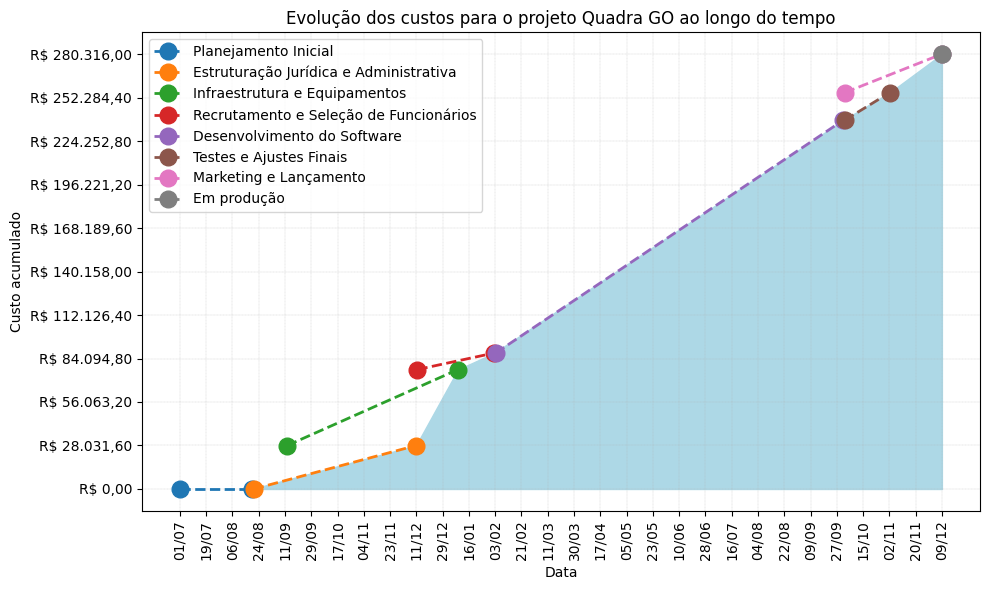

In [5]:
# Copiando o DataFrame filtrado
filteredDf = filteredDf.copy()

# Convertendo as colunas de data para o tipo datetime
filteredDf['Início'] = pd.to_datetime(filteredDf['Início'])
filteredDf['Término'] = pd.to_datetime(filteredDf['Término'])

# Selecionando a última linha do DataFrame
lastLineDf = filteredDf.iloc[-1].copy()

# Adicionando 1 ao máximo do número de tópicos e convertendo para string
newIndexGroups = str(int(filteredDf['Nº Grupos'].max()) + 1)

# Alterando as dados da última linha duplicada
lastLineDf['Início'] = filteredDf.iloc[-1]['Término']
lastLineDf['Término'] = filteredDf.iloc[-1]['Término']
lastLineDf['Nº Grupos'] = newIndexGroups
lastLineDf['Dura\u00e7\u00e3o em dias'] = 0
lastLineDf['Custo em reais'] = 0
lastLineDf['Nome da Tarefa'] = 'Em produção'

# Adicionando a última linha duplicada ao DataFrame
filteredDf.loc[len(filteredDf)] = lastLineDf

# Calculando o custo acumulado com deslocamento
filteredDf['Custo acumulado'] = filteredDf['Custo em reais'].cumsum()
filteredDf['Custo acumulado com deslocamento'] = filteredDf['Custo em reais'].shift(1).cumsum()

# Preenchendo o primeiro valor de 'Custo acumulado' com 0
filteredDf['Custo acumulado com deslocamento'].fillna(0, inplace=True)

# Definindo a data final do projeto
endProjectDate = filteredDf['Término'].max()

# Selecionando os dados até a data final do projeto
dataUntilEndOfProject = filteredDf[filteredDf['Término'] <= endProjectDate]

# Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Iterando sobre as linhas do DataFrame para plotar uma linha para cada grupo
for index, row in filteredDf.iterrows():
  plt.plot([row['Início'], row['Término']], [row['Custo acumulado com deslocamento'], row['Custo acumulado']], label=row['Nome da Tarefa'], marker='o', linestyle='dashed', linewidth=2, markersize=12)

# Preenchendo a área abaixo da linha
plt.fill_between(filteredDf['Término'], filteredDf['Custo acumulado'], color='lightblue')

# Adicionando grades ao gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.2)

# Adicionando rótulos e título
plt.xlabel('Data')
plt.ylabel('Custo acumulado')
plt.title('Evolução dos custos para o projeto Quadra GO ao longo do tempo')

# Exibindo a legenda
plt.legend()

# Especificando os pontos para o eixo x e distribuindo uniformemente ao longo do período do projeto
startDate = dataUntilEndOfProject['Início'].min()
endDate = dataUntilEndOfProject['Término'].max()
dateRange = pd.date_range(start=startDate, end=endDate, periods=30)
plt.xticks(dateRange, rotation=90)

# Adjusting the x-axis date format to 'dd/MM/yy'
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%d/%m'))

# Encontrando o maior valor do custo acumulado
maxCost = dataUntilEndOfProject['Custo acumulado'].max()

# Calculando o intervalo para o eixo y
yTicksInterval = maxCost / 10

# Especificando os intervalos desejados para o eixo y
plt.yticks(np.arange(0, maxCost + yTicksInterval, yTicksInterval))

# Formatando valor monetário para reais
def currencyFormatter(x, pos):
  return 'R$ {:,.2f}'.format(x).replace(',', ';').replace('.', ',').replace(';', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(currencyFormatter))

# Exibindo o gráfico
plt.tight_layout()
plt.show()
